<a href="https://colab.research.google.com/github/Anna-Tereshchuk/Data-Engineering-Notebooks/blob/main/final_projekt_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дані успішно завантажено.
Дані очищено від пропущених значень.

Кількість організацій за країною:
Country
Benin                           3
Sweden                          3
Northern Mariana Islands        2
United States Virgin Islands    2
Eritrea                         2
Luxembourg                      2
Korea                           2
Zimbabwe                        2
Togo                            2
Taiwan                          2
Name: count, dtype: int64

Найбільш популярна індустрія:
Plastics

Середня кількість співробітників:
4964.86


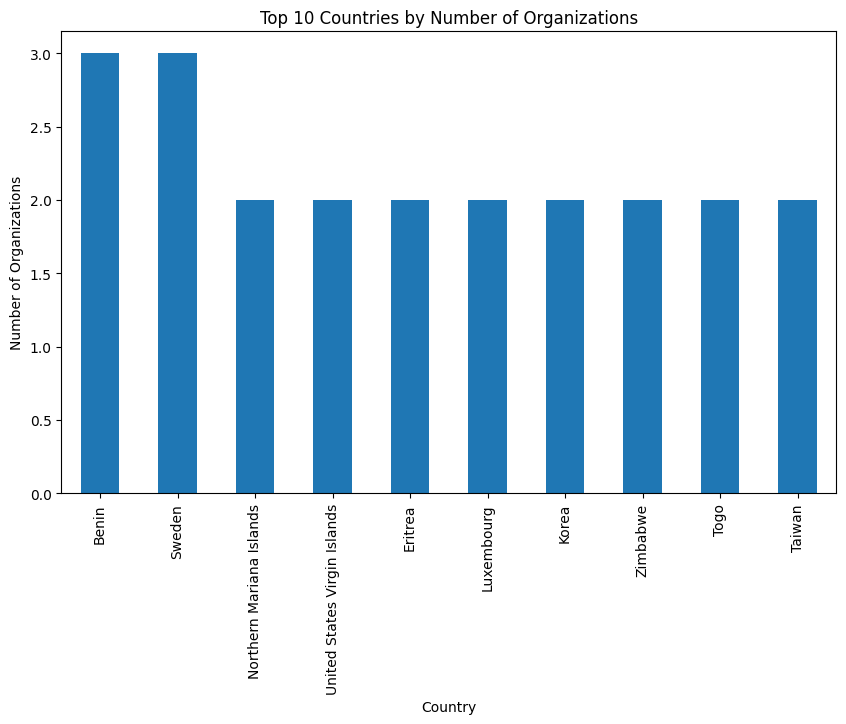

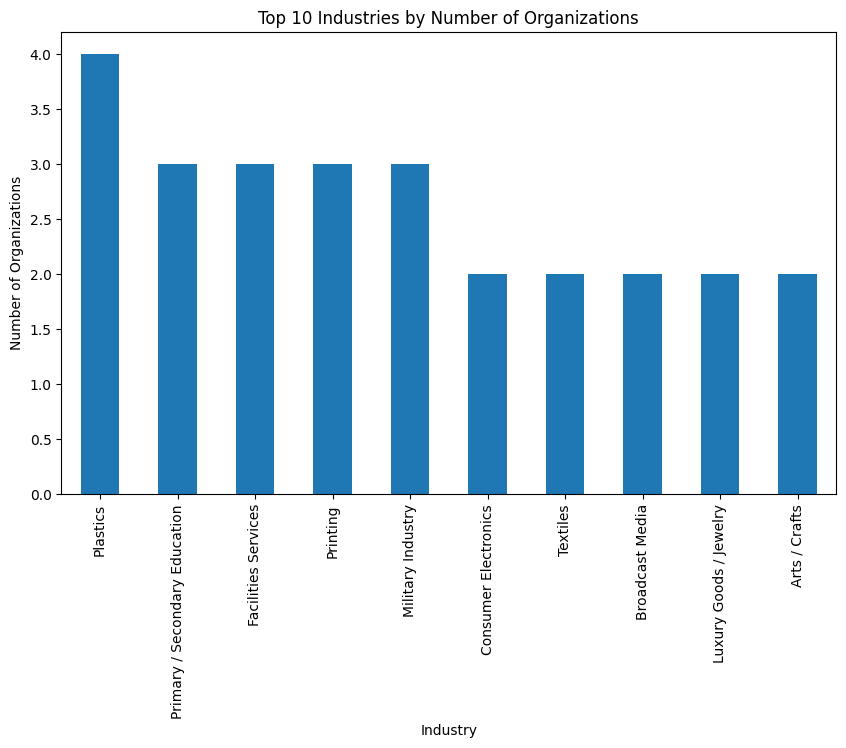

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

class OrganizationDataAnalyzer:
    def __init__(self, file_path):
        """
        Ініціалізація класу: перевірка наявності файлу та завантаження даних із CSV.
        """
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Файл за шляхом {file_path} не знайдено.")

        self.data = pd.read_csv(file_path)
        self.data['Founded'] = pd.to_datetime(self.data['Founded'], errors='coerce')  # Конвертуємо дати
        print("Дані успішно завантажено.")

    def data_clean(self):
        """
        Очищення даних: видалення рядків із пропущеними значеннями.
        """
        self.data.dropna(inplace=True)
        print("Дані очищено від пропущених значень.")

    def organizations_per_country(self):
        """
        Розрахунок кількості організацій за країною.
        """
        return self.data['Country'].value_counts()

    def most_popular_industry(self):
        """
        Визначення найбільш популярної індустрії.
        """
        return self.data['Industry'].mode()[0]

    def average_employees(self):
        """
        Розрахунок середньої кількості співробітників.
        """
        return self.data['Number of employees'].mean()

    def plot_organizations_per_country(self):
        """
        Побудова графіку кількості організацій за країною (топ-10).
        """
        org_per_country = self.organizations_per_country().head(10)
        org_per_country.plot(kind='bar', title='Top 10 Countries by Number of Organizations', figsize=(10, 6))
        plt.xlabel('Country')
        plt.ylabel('Number of Organizations')
        plt.show()

    def plot_industry_distribution(self):
        """
        Побудова графіку розподілу організацій за індустріями (топ-10).
        """
        industry_counts = self.data['Industry'].value_counts().head(10)
        industry_counts.plot(kind='bar', title='Top 10 Industries by Number of Organizations', figsize=(10, 6))
        plt.xlabel('Industry')
        plt.ylabel('Number of Organizations')
        plt.show()


# Головний скрипт
if __name__ == "__main__":
    # 1. Змінна для зберігання шляху до файлу
    file_path = "/organizations-100.csv"  # Задайте шлях до файлу

    try:
        # 2. Створення об'єкта аналізатора
        analyzer = OrganizationDataAnalyzer(file_path)

        # 3. Очищення даних
        analyzer.data_clean()

        # 4. Аналіз даних
        print("\nКількість організацій за країною:")
        print(analyzer.organizations_per_country().head(10))

        print("\nНайбільш популярна індустрія:")
        print(analyzer.most_popular_industry())

        print("\nСередня кількість співробітників:")
        print(analyzer.average_employees())

        # 5. Візуалізація
        analyzer.plot_organizations_per_country()
        analyzer.plot_industry_distribution()

    except FileNotFoundError as e:
        print(e)
    except Exception as e:
        print(f"Сталася помилка: {e}")
